### **Abdullah Mohamed Abdeltawab** ###
#### *Computer Engineering Student | Data Science & Machine Learning Enthusiast* ####

**I am a Computer Engineering student with a strong passion for Data Science and Machine Learning. I am eager to explore the potential of AI in solving real-world problems, particularly in predictive analytics and automation. Currently, I am working on expanding my knowledge in machine learning algorithms and data analysis techniques.**

##### Email:bs3416567@gmail.com

### Disease Classification Using Machine Learning

**I developed a machine learning model for disease classification based on ECG signal analysis. The project involved preprocessing raw ECG data, extracting relevant features, and training a classification model to detect specific health conditions. The goal was to leverage AI to improve early diagnosis and medical decision-making.**



### **Understanding the EKG Basics** ###
##### *What is an EKG?*

**An electrocardiogram (EKG) is a non-invasive test that records the electrical activity of the heart over a specific period. By capturing this data, EKGs can provide information about the heart’s rhythm, rate, and potential structural issues.**

##### An EKG is made up of various waveforms and intervals, each representing different stages of cardiac electrical activity. These elements include:

###### **P wave**: *Reflects atrial depolarization*
###### **QRS complex**: *Represents ventricular depolarization*
###### **T wave**: *Indicates ventricular repolarization*
###### **PR interval**: *Measures the time it takes for the electrical signal to travel from the atria to the ventricles*
###### **ST segment**: *Connects the QRS complex and T wave, with deviations indicating possible ischemia or infarction.*
**Understanding each of these components is essential for accurate EKG interpretation.**

# import librareis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# Read the CSV data

In [2]:
data = pd.read_csv("ECGCvdata.csv")

# Exploratory Data Analysis (EDA)

#  Univariate Analysis
**Univariate analysis focuses on studying one variable to understand its characteristics. It helps describe the data and find patterns within a single feature. Common methods include histograms to show data distribution, box plots to detect outliers and understand data spread, and bar charts for categorical data. Summary statistics like mean, median, mode, variance, and standard deviation help describe the central tendency and spread of the data**

# what dose the data contain

In [3]:
data.shape

(1200, 56)

**contain 1200 rows and 56 coulmns**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

**we have some massing values**

In [5]:
data.head().T

,0,1,2,3,4
RECORD,1,2,3,4,5
hbpermin,74.925669,68.503469,83.488603,68.503469,82.08
Pseg,0.076508,0.072483,0.071154,0.082812,0.07076
PQseg,0.108889,0.096181,0.08661,0.10816,0.102632
QRSseg,0.088254,0.093924,0.03953,0.090365,0.101023
QRseg,0.043571,0.046267,0.01859,0.045226,0.049415
QTseg,0.193016,0.19349,0.132479,0.188802,0.193713
RSseg,0.044683,0.047656,0.02094,0.045139,0.051608
STseg,0.104762,0.099566,0.092949,0.098437,0.09269
Tseg,0.130476,0.089149,0.094444,0.088281,0.085965


## convert some of coloumn name 

#### take a copy from data 

In [94]:
df = data.copy()

In [95]:
df.columns

Index(['RECORD', 'hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg',
       'RSseg', 'STseg', 'Tseg', 'PTseg', 'ECGseg', 'QRtoQSdur', 'RStoQSdur',
       'RRmean', 'PPmean', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis',
       'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis',
       'QToffdis', 'RSdis', 'RTdis', 'RToffdis', 'STdis', 'SToffdis',
       'PonToffdis', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang',
       'RRTot', 'NNTot', 'SDRR', 'IBIM', 'IBISD', 'SDSD', 'RMSSD', 'QRSarea',
       'QRSperi', 'PQslope', 'QRslope', 'RSslope', 'STslope', 'NN50', 'pNN50',
       'ECG_signal'],
      dtype='object')

In [96]:
df.rename(columns={'hbpermin':'heart_rate',
                  'Pseg':'Pwave',
                  'Tseg':'Twave',
                  'QRSseg':'QRScomplex',
                  'QTseg':'QTinterval',
                  'PTseg':'TPseg',
                  'RRmean':'R-Rinterval',
                  'PPmean':'P-Pinterval',
                  'PQdis':'PQinterval',
                  'PRdis':'PRinterval',
                  'QRdis':'QRinterval',
                  'RSdis':'RSinterval',
                  'ECG_signal':'Type_of_disease'
                  },inplace=True)

**QTseg == QTinterval and ST dis == STseg so i will drop them**

In [97]:
df = df.drop(['QTdis' ,'STdis'] , axis=1)

In [98]:
df.shape

(1200, 54)

In [99]:
# show the massing values 
df.isna().mean()*100

RECORD              0.000000
heart_rate          0.000000
Pwave               0.000000
PQseg               0.000000
QRScomplex          0.000000
QRseg               0.000000
QTinterval          0.000000
RSseg               0.000000
STseg               0.000000
Twave               0.000000
TPseg               0.000000
ECGseg              0.000000
QRtoQSdur          64.083333
RStoQSdur          64.083333
R-Rinterval         0.000000
P-Pinterval         0.000000
PQinterval          0.000000
PonQdis             0.000000
PRinterval          0.000000
PonRdis             0.000000
PSdis               0.000000
PonSdis             0.000000
PTdis               0.000000
PonTdis             0.000000
PToffdis            0.000000
QRinterval          0.000000
QSdis               0.000000
QToffdis            0.000000
RSinterval          0.000000
RTdis               0.000000
RToffdis            0.000000
SToffdis            0.000000
PonToffdis          0.000000
PonPQang           46.416667
PQRang        

In [100]:
coulomn_has_massing_values = ['QRtoQSdur' ,'RStoQSdur' ,'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang', 'QRslope', 'RSslope' ]

In [101]:
# drop them
df = df.drop(coulomn_has_massing_values ,axis=1)

In [102]:
df.shape

(1200, 45)

**the mini value in QRScomplex its ilogicall value**

In [103]:
QRS =df[df['QRScomplex']==0]

In [104]:
QRS[['QRinterval','QRseg','RSseg']]

,QRinterval,QRseg,RSseg
44,0.0,0.0,0.0
47,0.0,0.0,0.0
50,0.0,0.0,0.0
51,0.0,0.0,0.0
55,0.0,0.0,0.0
56,0.0,0.0,0.0
58,0.0,0.0,0.0
61,0.0,0.0,0.0
66,0.0,0.0,0.0
67,0.0,0.0,0.0


In [105]:
df[df.duplicated]

,RECORD,heart_rate,Pwave,PQseg,QRScomplex,QRseg,QTinterval,RSseg,STseg,Twave,...,IBISD,SDSD,RMSSD,QRSarea,QRSperi,PQslope,STslope,NN50,pNN50,Type_of_disease


In [106]:
#convert value of some columns from m_sec to sec 
m_sec = ['R-Rinterval','P-Pinterval','PQinterval','PRinterval','QRinterval']

for col in m_sec:
    df[col] = df[col]/1000

In [107]:
df[['heart_rate', 'Pwave', 'PQseg', 'QRScomplex', 'QRseg',
       'QTinterval', 'RSseg', 'STseg', 'Twave', 'TPseg', 'ECGseg',
       'R-Rinterval', 'P-Pinterval', 'PQinterval',  'PRinterval','QRinterval']]


,heart_rate,Pwave,PQseg,QRScomplex,QRseg,QTinterval,RSseg,STseg,Twave,TPseg,ECGseg,R-Rinterval,P-Pinterval,PQinterval,PRinterval,QRinterval
0,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,0.426111,0.291794,0.291735,0.039151,0.054827,0.015721
1,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,0.366667,0.318387,0.318323,0.034588,0.051262,0.016736
2,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,0.293234,0.259763,0.259526,0.031266,0.038131,0.006896
3,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,0.373177,0.312839,0.312839,0.038942,0.055232,0.016359
4,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,0.375073,0.260784,0.260865,0.037005,0.054786,0.017821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,91.392000,0.051353,0.062500,0.019150,0.010051,0.118045,0.009099,0.098895,0.086557,0.180545,0.221370,0.084110,0.084110,0.007021,0.007128,0.000110
1196,61.440000,0.057355,0.061547,0.061261,0.031345,0.134099,0.029916,0.072837,0.090987,0.195646,0.278868,0.124557,0.124557,0.006687,0.012362,0.005879
1197,93.322709,0.058927,0.109137,0.080936,0.040301,0.168112,0.040635,0.087176,0.088081,0.277248,0.343702,0.081983,0.081983,0.015098,0.020548,0.005618
1198,63.744000,0.061500,0.101277,0.081793,0.041159,0.145913,0.040635,0.064120,0.081174,0.247189,0.330840,0.120073,0.120073,0.012920,0.018615,0.005889


# show the destrepuion of data and detect outliers

### 1) Columns that represent the waves
**Pwave ,Twave ,QRScomplex**

In [19]:
waves_coulmns = ['Pwave' ,'Twave' ,'QRScomplex']

In [20]:
def hest_gram(column_name ,color):
    column_name = column_name


    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True, bins=50, color=color, edgecolor="black")


    plt.title(f"Distribution of {column_name}", fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)


    plt.show()

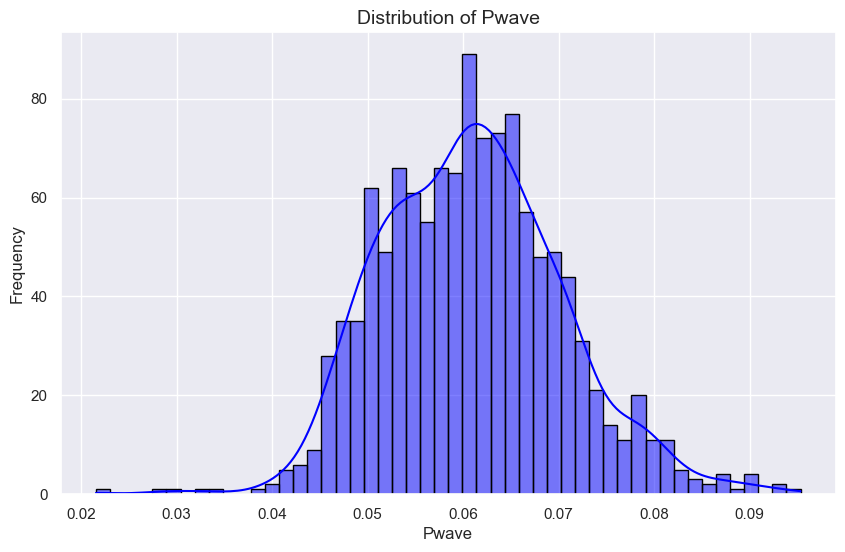

In [21]:
hest_gram('Pwave','blue')

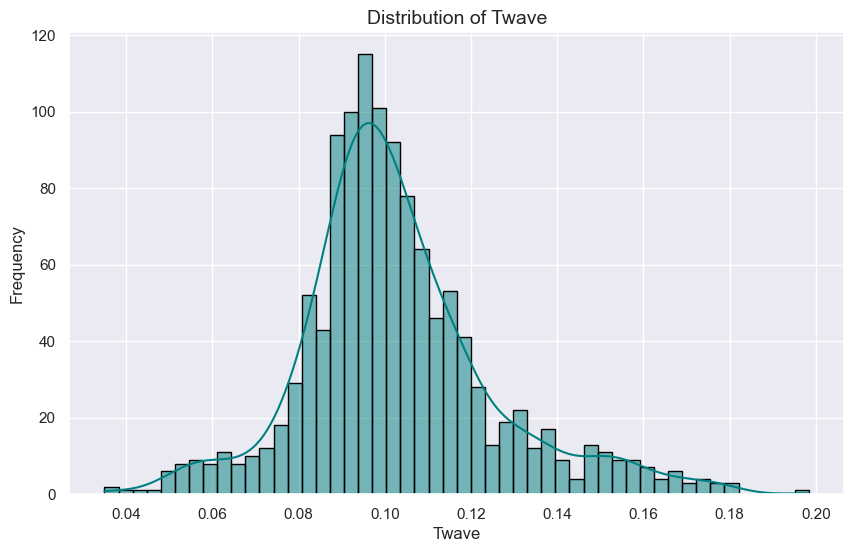

In [22]:
hest_gram('Twave' ,'teal')

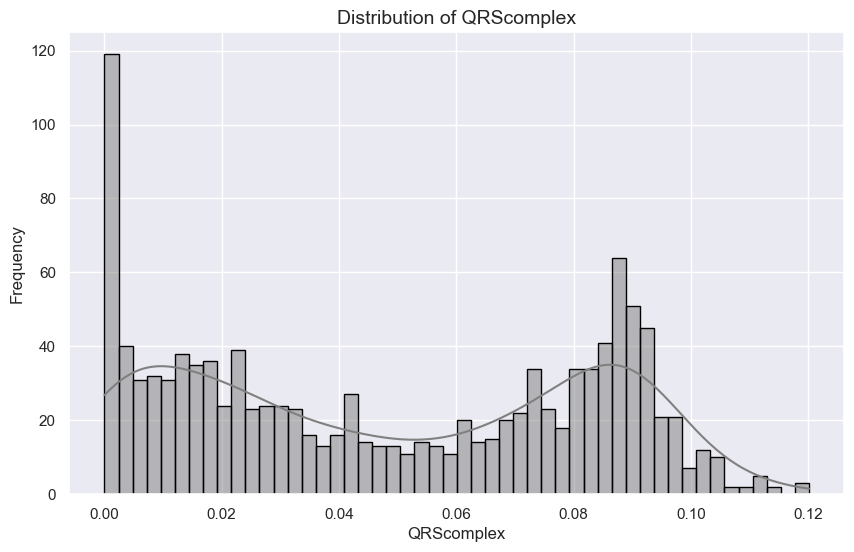

In [23]:
hest_gram('QRScomplex' ,'gray')

In [24]:
def box_blots(coulmns):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=coulmns)

    plt.title("Box Plot of Health Variables")
    plt.xlabel("Variables")
    plt.ylabel("Values")

    plt.show()

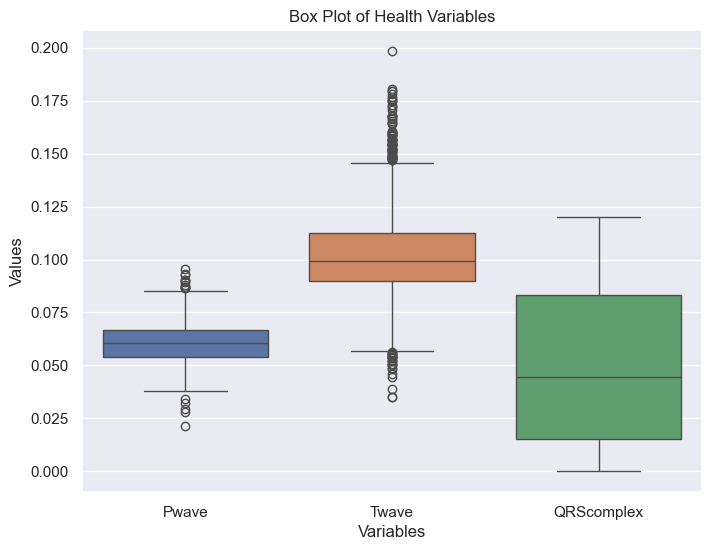

In [25]:
box_blots(df[['Pwave' ,'Twave' ,'QRScomplex']])

In [26]:
#recording the coulmn have outliers to handel them 
column_has_outliers1 = ['Pwave' , 'Twave']

In [27]:
df.columns

Index(['RECORD', 'heart_rate', 'Pwave', 'PQseg', 'QRScomplex', 'QRseg',
       'QTinterval', 'RSseg', 'STseg', 'Twave', 'TPseg', 'ECGseg',
       'R-Rinterval', 'P-Pinterval', 'PQinterval', 'PonQdis', 'PRinterval',
       'PonRdis', 'PSdis', 'PonSdis', 'PTdis', 'PonTdis', 'PToffdis',
       'QRinterval', 'QSdis', 'QToffdis', 'RSinterval', 'RTdis', 'RToffdis',
       'SToffdis', 'PonToffdis', 'RRTot', 'NNTot', 'SDRR', 'IBIM', 'IBISD',
       'SDSD', 'RMSSD', 'QRSarea', 'QRSperi', 'PQslope', 'STslope', 'NN50',
       'pNN50', 'Type_of_disease'],
      dtype='object')

### 2) Columns that represent the segmant
**'PQseg' ,'QRseg','RSseg' , 'STseg' , TPseg**

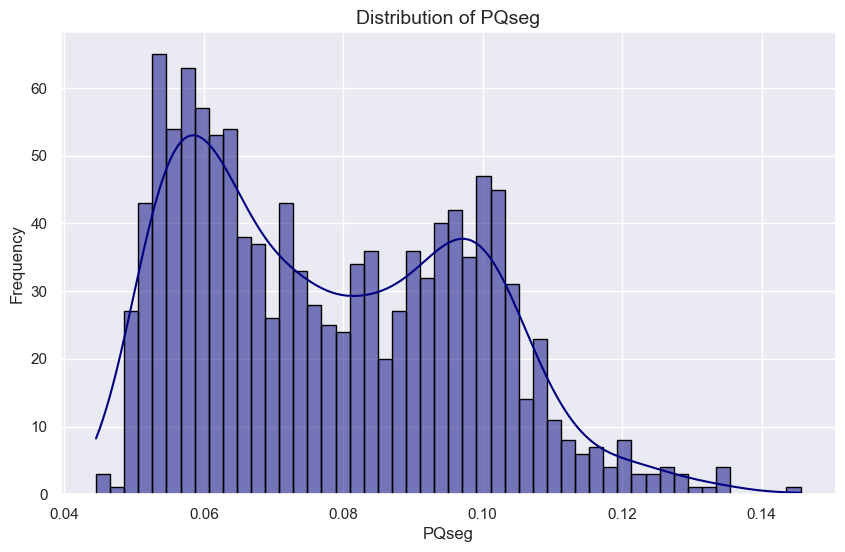

In [28]:
hest_gram('PQseg' ,'navy')

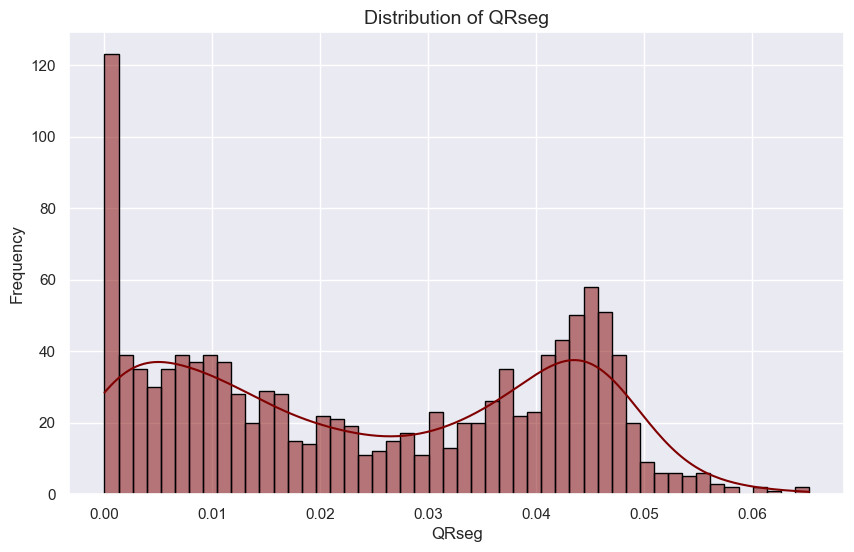

In [29]:
hest_gram('QRseg' ,'maroon')

hest_gram('RSseg' ,'indigo')

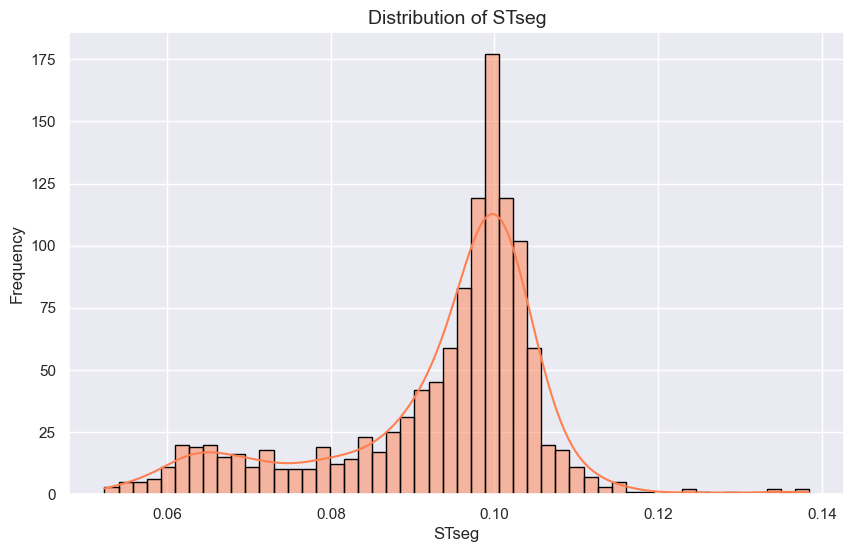

In [30]:
hest_gram('STseg' ,'coral')

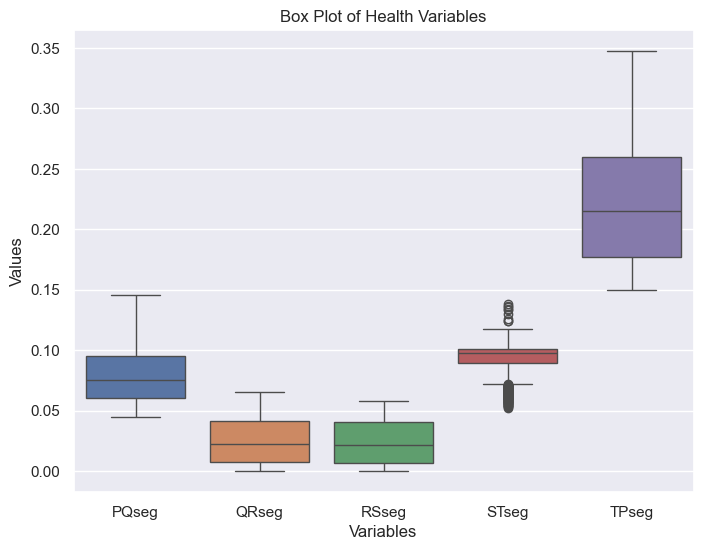

In [31]:
box_blots(df[['PQseg' ,'QRseg','RSseg' , 'STseg','TPseg']])

In [32]:
columns_have_outliers2 = ['STseg']

### 3) Columns that represent the interval
**'QTinterval'  , 'R-Rinterval' , 'P-Pinterval' , 'PQinterval' , 'PRinterval' , 'QRinterval' , 'RSinterval'**

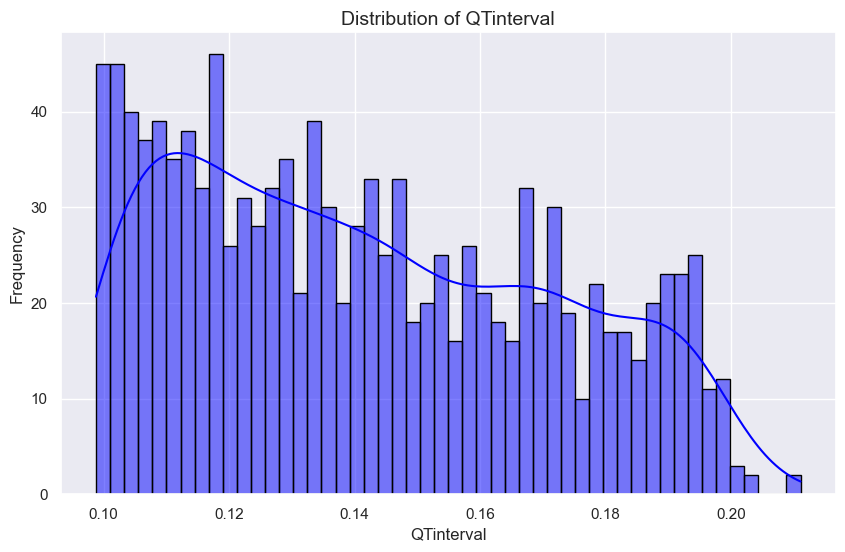

In [33]:
hest_gram('QTinterval' , 'blue')

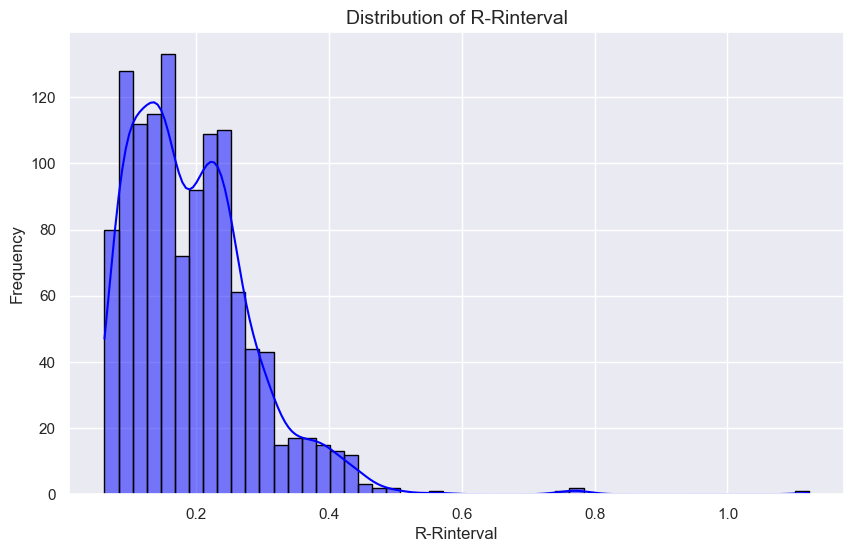

In [34]:
hest_gram('R-Rinterval' , 'blue')

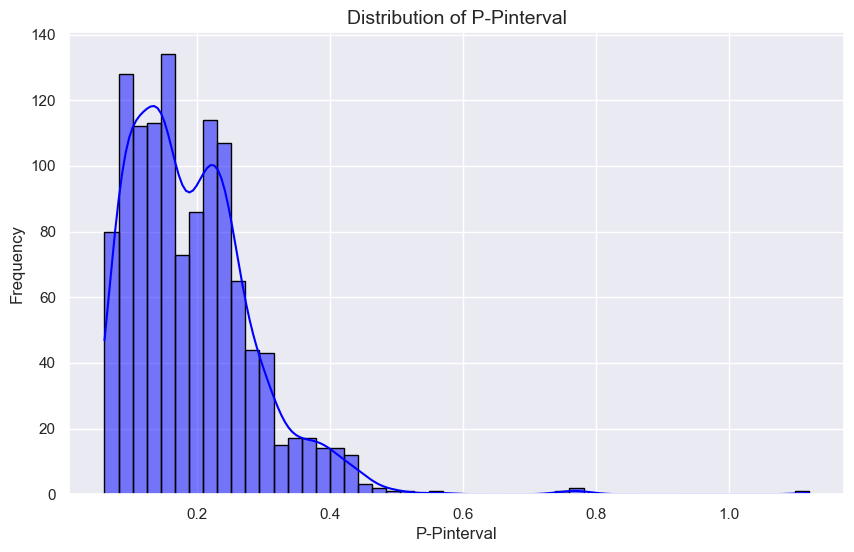

In [35]:
hest_gram('P-Pinterval' , 'blue')

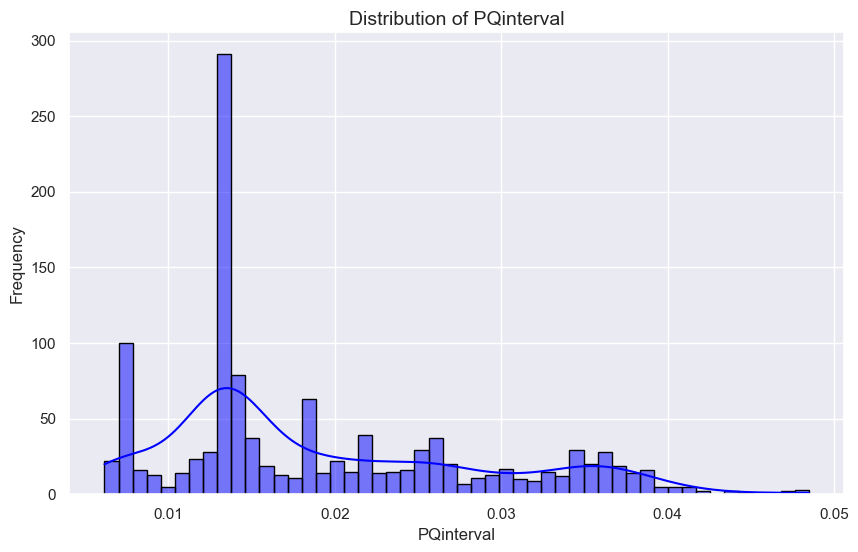

In [36]:
hest_gram('PQinterval' , 'blue')

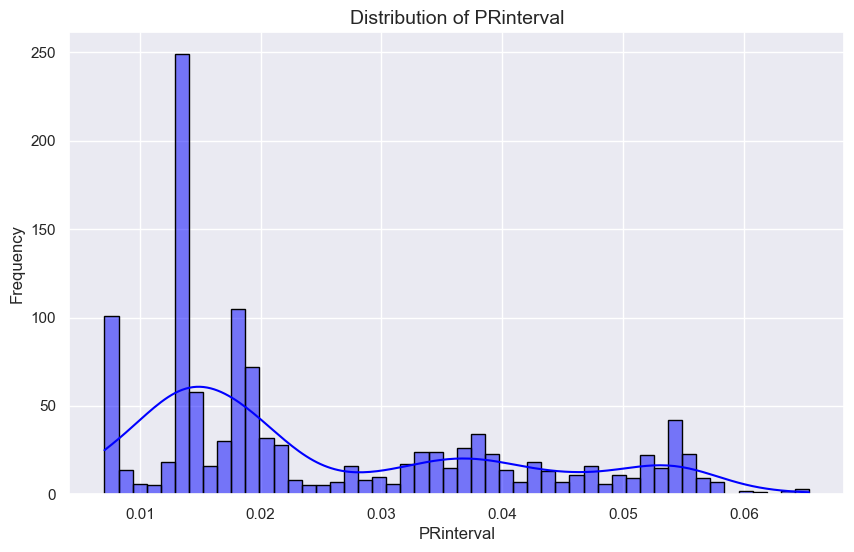

In [37]:
hest_gram('PRinterval' , 'blue')

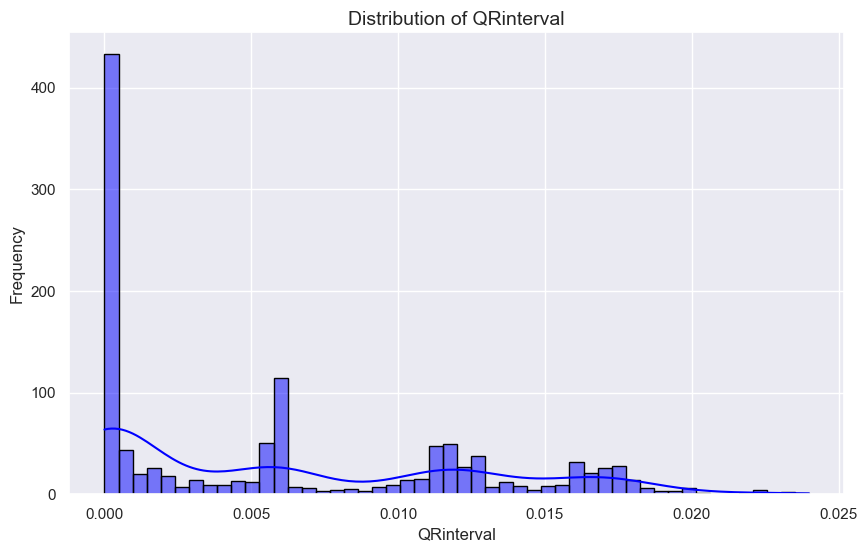

In [38]:
hest_gram('QRinterval' , 'blue')

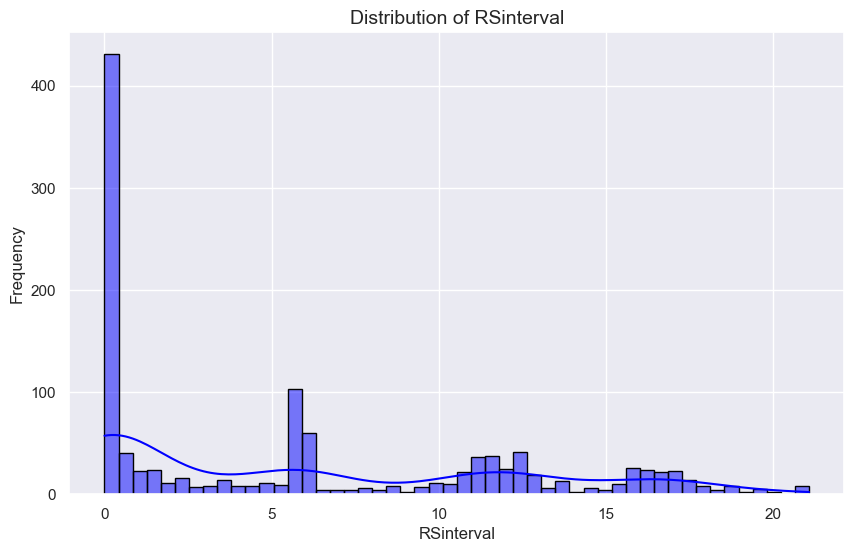

In [39]:
hest_gram('RSinterval' , 'blue')

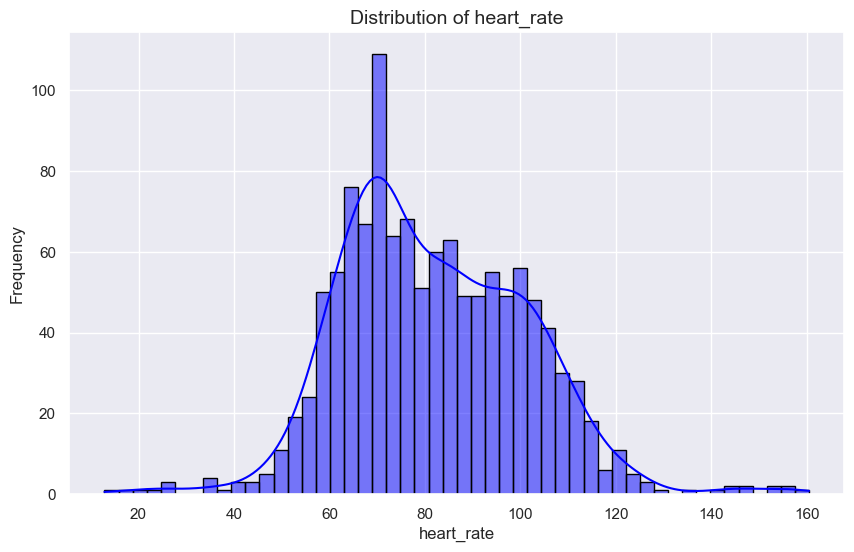

In [40]:
hest_gram('heart_rate' , 'blue')

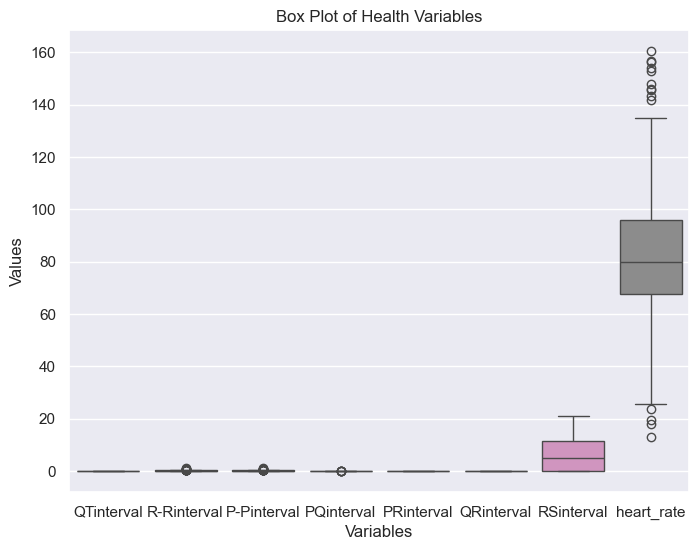

In [41]:
box_blots(df[['QTinterval'  , 'R-Rinterval' , 'P-Pinterval' , 'PQinterval' , 'PRinterval' , 'QRinterval' , 'RSinterval','heart_rate']])

In [42]:
columns_have_outlires3 = ['R-Rinterval' , 'P-Pinterval' , 'PQinterval']

# column represent the target ('Type_of_disease')

In [43]:
df['Type_of_disease'].value_counts()

Type_of_disease
ARR    300
AFF    300
CHF    300
NSR    300
Name: count, dtype: int64

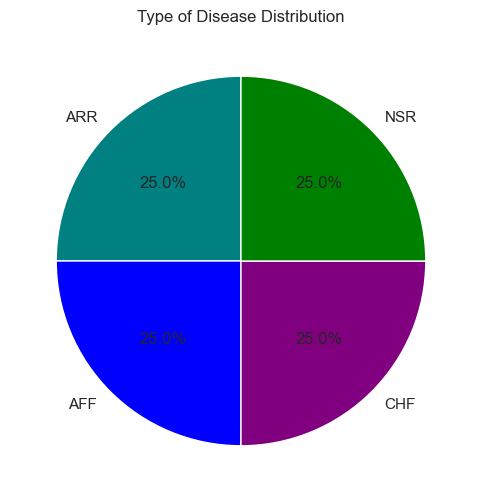

In [44]:
column_name = 'Type_of_disease' 
sizes = df[column_name].value_counts()
labels = sizes.index 
colors = ['teal', 'blue','purple', 'green'][:len(labels)] 
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) 
plt.title('Type of Disease Distribution')
plt.show()

**These terms refer to different types of heart rhythms or conditions related to the heart's electrical activity, often seen in ECG (Electrocardiogram) analysis**:

### 1️⃣ ARR (Arrhythmia)

**This refers to irregular heart rhythms, meaning the heartbeat is too fast, too slow, or erratic.
It can be caused by electrical signal disruptions in the heart.
Common types include atrial fibrillation, bradycardia, and tachycardia.**
### 2️⃣ AFF (Atrial Fibrillation, AFib)

**A specific type of arrhythmia where the atria (upper chambers of the heart) beat chaotically and irregularly.
This can cause blood clots, increasing the risk of stroke and heart failure.**
### 3️⃣ CHF (Congestive Heart Failure)

**A condition where the heart is unable to pump blood efficiently, leading to fluid buildup in the lungs and other organs.
Symptoms include shortness of breath, fatigue, and swelling in the legs.
Can be caused by high blood pressure, coronary artery disease, or previous heart attacks.**
### 4️⃣ NSR (Normal Sinus Rhythm)

**This represents a healthy and regular heart rhythm (60–100 beats per minute).
The electrical signals originate from the sinus node, the heart’s natural pacemaker.
NSR means the heart is functioning normally without arrhythmias.**

# Analysis 

### Check the Heart Rate for each type of disease
#### normal range (60-100 bpm for adults)

In [45]:
def plot_box_for_disease(df, column, disease_column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[disease_column], y=df[column])

    plt.title(f"Distribution of {column} by Disease Type")
    plt.xlabel("Disease Type")
    plt.ylabel(column)


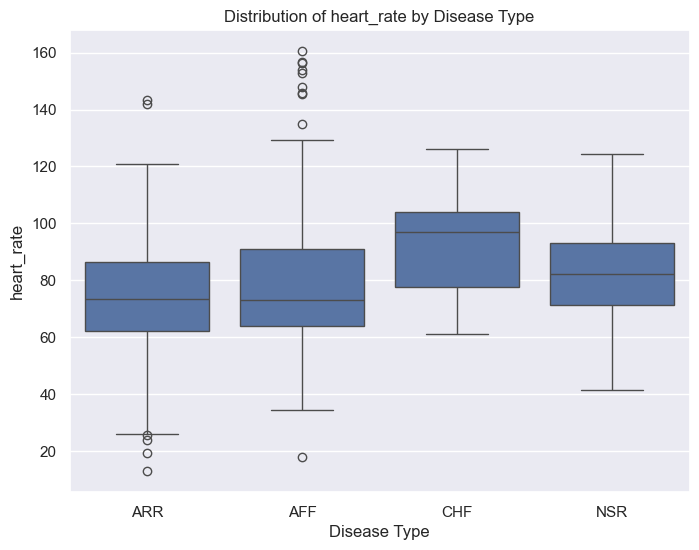

In [46]:
plot_box_for_disease(df , 'heart_rate' ,'Type_of_disease')

**Heart rate in disease ARR and AFF out of normal range**

### Evaluate the Rhythm for each disease
**Determine if the heart rhythm is regular or irregular by assessing the R-R intervals.**

###### *Regular Rhythm: Consistent R-R intervals.*
###### *Irregular Rhythm: Variable R-R intervals, which can be due to arrhythmias like atrial fibrillation or ectopic beats.*

In [47]:
# Compute standard deviation for each disease
disease_std = df.groupby('Type_of_disease')['R-Rinterval'].std()

# Determine a dynamic threshold (e.g., 20% of the mean std)
threshold = disease_std.mean() * 0.5

# Function to classify disease rhythm based on standard deviation
def classify_disease_rhythm(disease):
    std_dev = disease_std.get(disease, None)  # Get std dev for the disease
    if std_dev is None or np.isnan(std_dev):
        return "Unknown"
    return "Regular" if std_dev < threshold else "Irregular"
# Apply the function to classify rhythm for each row in df
df['Rhythm'] = df['Type_of_disease'].apply(classify_disease_rhythm)



C:\Users\Fathy mohammed\AppData\Local\Temp\ipykernel_17888\3069605392.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['HR_Range', 'Rhythm']).size().unstack().fillna(0)


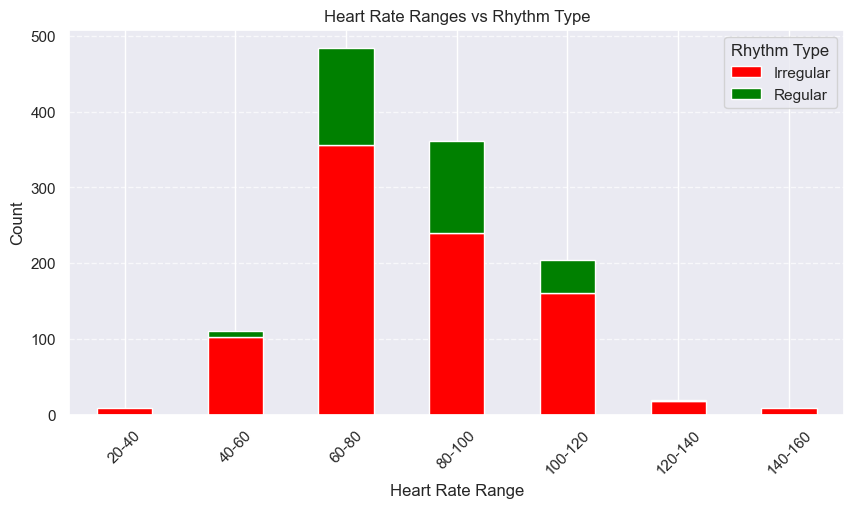

In [48]:
bins = [20, 40, 60, 80, 100, 120, 140, 160]  # تحديد النطاقات
labels = ["20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140-160"]
df['HR_Range'] = pd.cut(df['heart_rate'], bins=bins, labels=labels, right=False)
grouped = df.groupby(['HR_Range', 'Rhythm']).size().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 5))
plt.title("Heart Rate Ranges vs Rhythm Type")
plt.xlabel("Heart Rate Range")
plt.ylabel("Count")
plt.legend(title="Rhythm Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


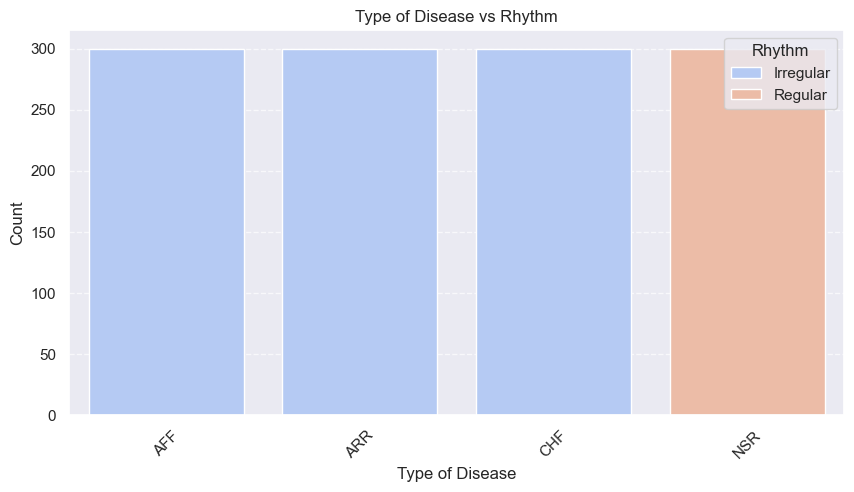

In [49]:
df_grouped = df.groupby(['Type_of_disease', 'Rhythm']).size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='Type_of_disease', y='Count', hue='Rhythm', data=df_grouped, palette='coolwarm')

plt.title("Type of Disease vs Rhythm")
plt.xlabel("Type of Disease")
plt.ylabel("Count")
plt.legend(title="Rhythm")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Analyze the P Waves

### Check if P waves are present and uniform, as they represent atrial depolarization.

###### **Sinus Rhythm: P waves should be consistent in shape, preceding each QRS complex**.
###### **Abnormal P Waves: May indicate an atrial abnormality, such as an atrial flutter or fibrillation.**

In [50]:
#  P waves should be consistent in shape, preceding each QRS complex.
# if PQ > PR preceding
# else subsequent 
# Create a new column that compares columns PQinterval and PRinterval
df['PQ<PR'] = df.apply(lambda row: row['PQinterval'] < row['PRinterval'], axis=1)
df['PQ<PR'] = df['PQ<PR'].apply(lambda row: 'preceding' if row == True else 'subsequent')


In [51]:
df['PQ<PR'].value_counts()

PQ<PR
preceding     971
subsequent    229
Name: count, dtype: int64

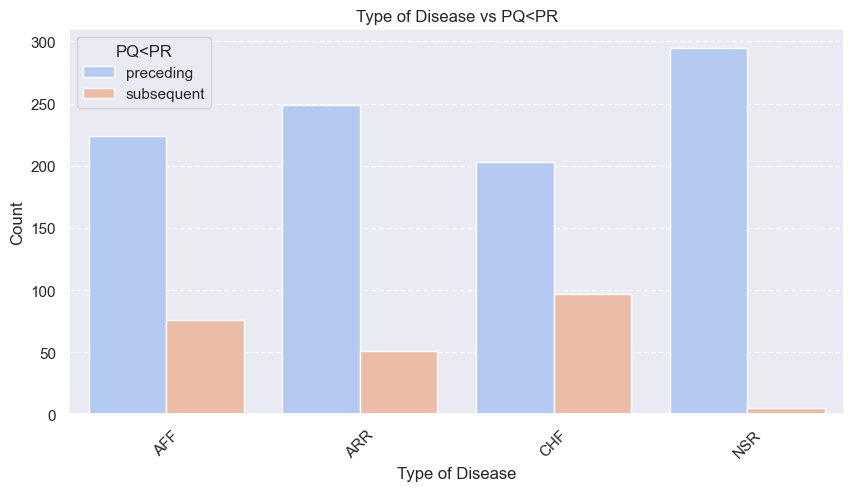

In [52]:
# In what type is PQ preceding ?
df_grouped = df.groupby(['Type_of_disease', 'PQ<PR']).size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='Type_of_disease', y='Count', hue='PQ<PR', data=df_grouped, palette='coolwarm')

plt.title("Type of Disease vs PQ<PR")
plt.xlabel("Type of Disease")
plt.ylabel("Count")
plt.legend(title="PQ<PR")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

###### **In NSR Pwave is normal so the case is normal**
###### **in AFF , ARR and CHF Pwave is Abnormal so Which causes a problem !**

# Assess the PR Interval 

### The PR interval measures the time between the onset of atrial and ventricular depolarization.
###### **Normal Range: 0.12-0.20 seconds.**
###### **Abnormal PR Intervals: Prolonged PR intervals may indicate heart blocks, while shortened intervals can suggest pre-excitation syndromes like Wolff-Parkinson-White (WPW)**

In [53]:
#  Sets the status of PR
df['PRcase'] = df['PRinterval'].apply(lambda case : 'Normal' if 12 < case < 20  else 'Abnormal')

In [54]:
df['PRcase'].value_counts()

PRcase
Abnormal    1200
Name: count, dtype: int64

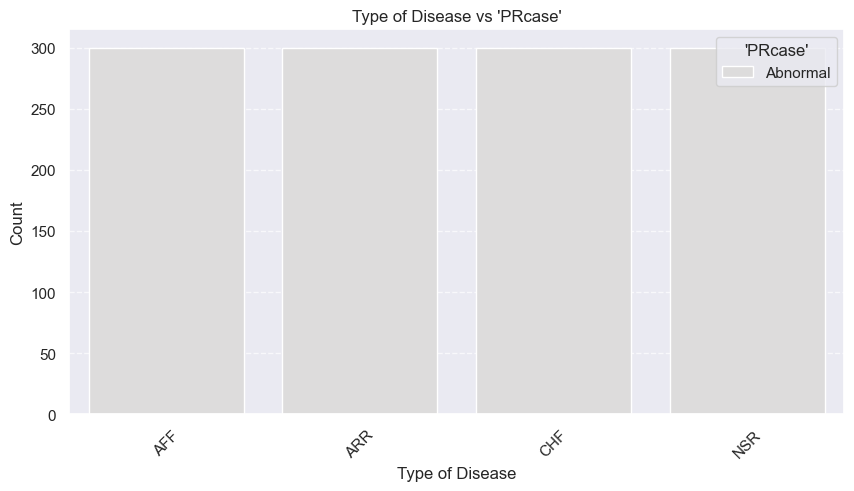

In [55]:
# In what type is PR is  noraml?
df_grouped = df.groupby(['Type_of_disease', 'PRcase']).size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='Type_of_disease', y='Count', hue='PRcase', data=df_grouped, palette='coolwarm')

plt.title("Type of Disease vs 'PRcase'")
plt.xlabel("Type of Disease")
plt.ylabel("Count")
plt.legend(title="'PRcase'")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RECORD,1200.0,600.500000,346.554469,1.000000,300.750000,600.500000,900.250000,1200.000000
heart_rate,1200.0,81.893980,19.324351,12.857143,67.563000,79.872000,96.000000,160.500000
Pwave,1200.0,0.060902,0.009453,0.021556,0.053943,0.060642,0.066849,0.095317
PQseg,1200.0,0.078099,0.019897,0.044526,0.060344,0.075184,0.095190,0.145577
QRScomplex,1200.0,0.048238,0.034649,0.000000,0.015101,0.044692,0.083032,0.120160
QRseg,1200.0,0.024437,0.017501,0.000000,0.007804,0.022676,0.041915,0.065278
QTinterval,1200.0,0.141541,0.029225,0.098761,0.116016,0.137019,0.166314,0.211111
RSseg,1200.0,0.023800,0.017175,0.000000,0.007143,0.021965,0.041097,0.058333
STseg,1200.0,0.093303,0.013332,0.052338,0.089423,0.097825,0.101200,0.138444
Twave,1200.0,0.102714,0.022594,0.034936,0.090046,0.099210,0.112408,0.198413


# Examine the QRS Complex

### The QRS complex reflects ventricular depolarization.
###### **Normal Range: Less than 0.12 seconds.**
###### **Wide QRS Complexes: Can indicate bundle branch blocks or ventricular rhythms.**

In [57]:
#  Sets the status of PR
df['QRScase'] = df['QRScomplex'].apply(lambda case : 'Normal' if 0.12 > case  else 'Abnirmal')

In [58]:
df['QRScase'].value_counts()

QRScase
Normal      1199
Abnirmal       1
Name: count, dtype: int64

# Evaluate the ST Segment

### The ST segment should be level with the baseline.

###### **ST Elevation: May indicate myocardial infarction (heart attack).**
###### **ST Depression: Often associated with ischemia or strain.**

### How do we determine the baseline?
###### **It is the straight line that appears when the heart is not in a state of contraction or active relaxation.**
###### **It passes through periods without large waves, such as the period between the end of the T wave and the beginning of the next P wave.**
###### **It should be stable and not fluctuate, unless there is interference or movement in the electrodes during recording.**
##### (TP is a baseline)

In [59]:
# Compared between STseg and PTseg 
# if (ST > PT ) Elveation 
#elif (ST < PT) Depression
# else NOrmal
df['STcase'] = np.where(df['STseg'] > df['TPseg'], 'Elevation', 
               np.where(df['STseg'] < df['TPseg'], 'Depression', 'Normal'))

In [60]:
df['STcase'].value_counts()

STcase
Depression    1200
Name: count, dtype: int64

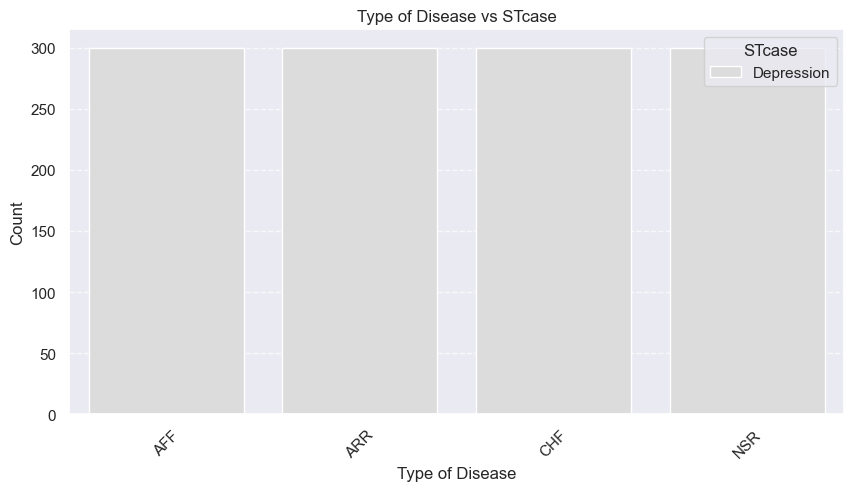

In [61]:
# In what which type ST is hight?
df_grouped = df.groupby(['Type_of_disease', 'STcase']).size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='Type_of_disease', y='Count', hue='STcase', data=df_grouped, palette='coolwarm')

plt.title("Type of Disease vs STcase")
plt.xlabel("Type of Disease")
plt.ylabel("Count")
plt.legend(title="STcase")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Inspect the T Wave 

### The T wave represents ventricular repolarization.
###### **Inverted T Waves: Can suggest ischemia or previous myocardial infarction.**
###### **Tall, Peaked T Waves: May indicate hyperkalemia (high potassium levels).**

In [62]:
# Sets the status of Twave
# conditions
conditions = [
    (df['Twave'] >= 0.1) & (df['Twave'] <= 0.5),
    (df['Twave'] > 0.5),
    (df['Twave'] < 0),
        (df['Twave'] < 0.1) & (df['Twave'] >= 0),  
]

values = ["Normal", "Peaked", "Inverted","Flattened"]
df['Tcase'] = np.select(conditions, values)

In [63]:
df['Tcase'].value_counts()

Tcase
Flattened    616
Normal       584
Name: count, dtype: int64

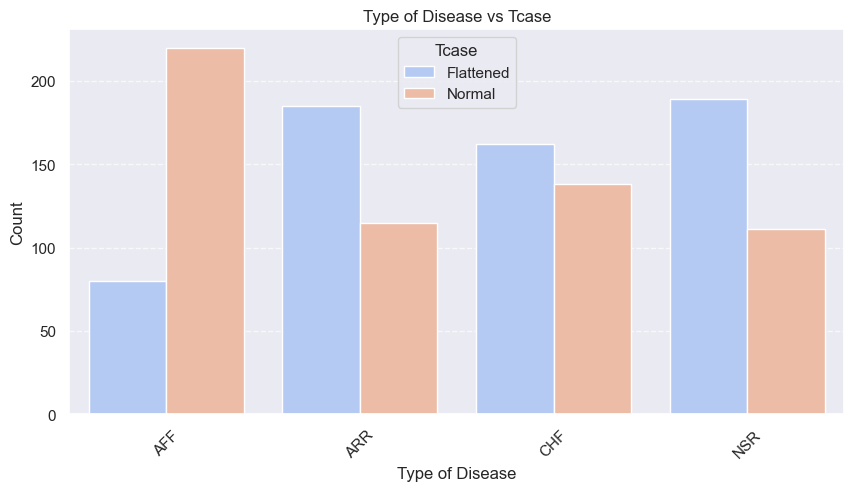

In [64]:
# What is status of Twave for Each type ?
df_grouped = df.groupby(['Type_of_disease', 'Tcase']).size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='Type_of_disease', y='Count', hue='Tcase', data=df_grouped, palette='coolwarm')

plt.title("Type of Disease vs Tcase")
plt.xlabel("Type of Disease")
plt.ylabel("Count")
plt.legend(title="Tcase")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#  Measure the QT Interval 

### The QT interval represents the time for both ventricular depolarization and repolarization.
###### **Normal Range: Should generally be less than 0.44 seconds.**
###### **Prolonged QT Interval: Associated with risk of arrhythmias like Torsades de Pointes.**

In [65]:
# Sets the status of QT
# conditions
conditions = [
    (df['QTinterval'] <= 0.44)  
]

values = ["Normal"]
df['QRScase'] = np.select(conditions, values,default='Abnormal')

In [66]:
df['QRScase'].value_counts()

QRScase
Normal    1200
Name: count, dtype: int64

In [67]:
df.columns

Index(['RECORD', 'heart_rate', 'Pwave', 'PQseg', 'QRScomplex', 'QRseg',
       'QTinterval', 'RSseg', 'STseg', 'Twave', 'TPseg', 'ECGseg',
       'R-Rinterval', 'P-Pinterval', 'PQinterval', 'PonQdis', 'PRinterval',
       'PonRdis', 'PSdis', 'PonSdis', 'PTdis', 'PonTdis', 'PToffdis',
       'QRinterval', 'QSdis', 'QToffdis', 'RSinterval', 'RTdis', 'RToffdis',
       'SToffdis', 'PonToffdis', 'RRTot', 'NNTot', 'SDRR', 'IBIM', 'IBISD',
       'SDSD', 'RMSSD', 'QRSarea', 'QRSperi', 'PQslope', 'STslope', 'NN50',
       'pNN50', 'Type_of_disease', 'Rhythm', 'HR_Range', 'PQ<PR', 'PRcase',
       'QRScase', 'STcase', 'Tcase'],
      dtype='object')

In [68]:
# Handel the columns
handling_columns = ['Type_of_disease' ,'Rhythm' ,'PRcase',
       'QRScase', 'STcase', 'Tcase']

In [69]:
from sklearn import preprocessing


In [70]:
label_encoders = {}
for col in df :
    incoder = preprocessing.LabelEncoder()
    df[col] = incoder.fit_transform(df[col])
    label_encoders [col] = incoder

In [71]:
matrix = df[['Type_of_disease' ,'Rhythm' ,'PRcase', 'Tcase' ,'heart_rate','Pwave', 'PQseg', 'QRScomplex', 'QRseg',
      'QTinterval', 'RSseg', 'Twave', 'TPseg','R-Rinterval', 'P-Pinterval']].corr()
   

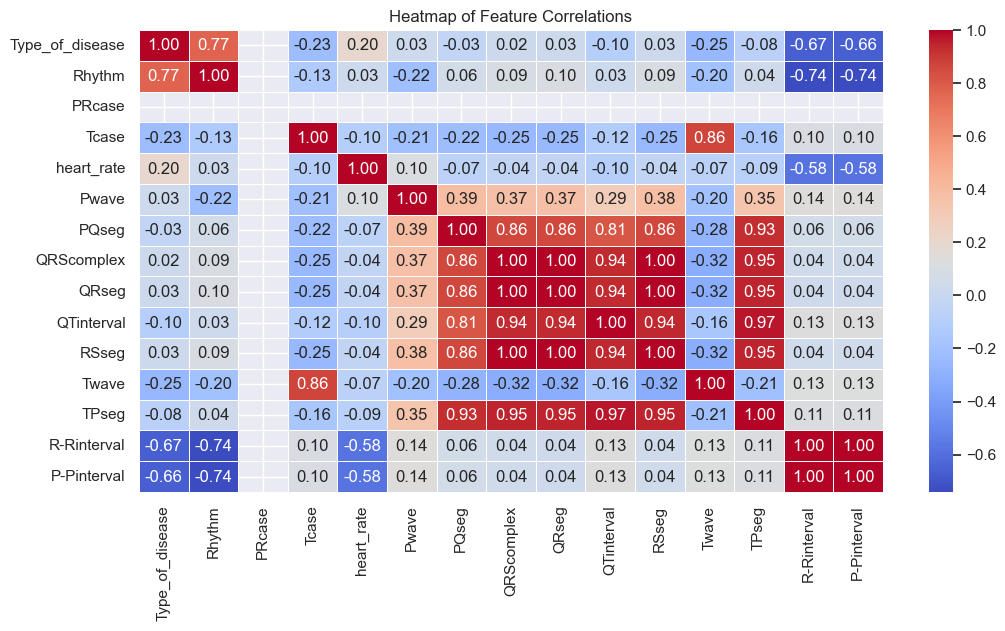

In [72]:
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [73]:
df['Type_of_disease'] = label_encoders['Type_of_disease'].inverse_transform(df['Type_of_disease'])

In [74]:
df['Type_of_disease']

0       ARR
1       ARR
2       ARR
3       ARR
4       ARR
       ... 
1195    NSR
1196    NSR
1197    NSR
1198    NSR
1199    NSR
Name: Type_of_disease, Length: 1200, dtype: object

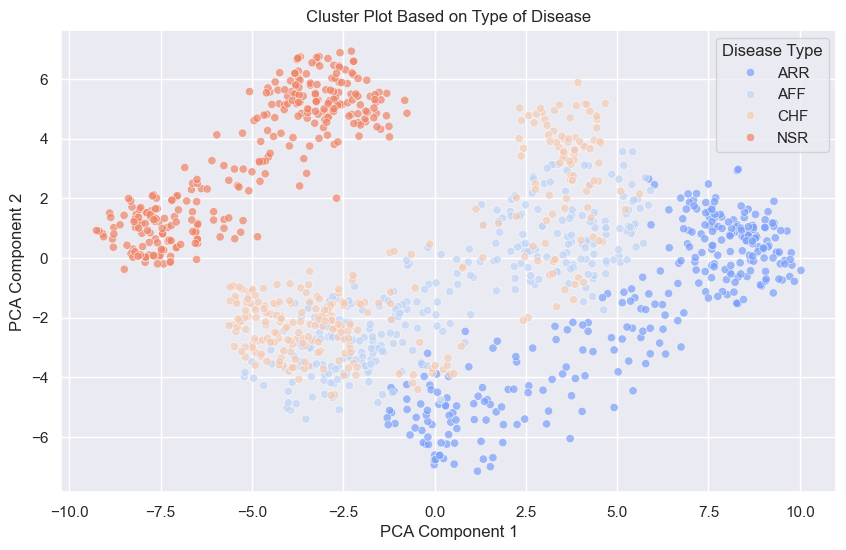

In [75]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['Type_of_disease'])


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


kmeans = KMeans(n_clusters=df["Type_of_disease"].nunique(), random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(pca_features)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df["Type_of_disease"], palette="coolwarm", alpha=0.7)
plt.title("Cluster Plot Based on Type of Disease")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Disease Type")
plt.show()


# Build the model

In [76]:
# Feature and Target Selection 
x = df[['heart_rate', 'Pwave', 'PQseg', 'QRScomplex', 'QRseg',
       'QTinterval', 'RSseg', 'STseg', 'Twave', 'TPseg', 'ECGseg',
       'R-Rinterval', 'P-Pinterval', 'PQinterval',  'PRinterval','QRinterval']]


y = df[['Type_of_disease']]

### split data 

In [77]:
from sklearn.model_selection import train_test_split


In [78]:
X_train ,X_test ,y_train ,y_test = train_test_split(x,y ,test_size=0.2 ,random_state=42)

### Train Tha Model

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


C:\Users\Fathy mohammed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fathy mohammed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fathy mohammed\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Fathy mohammed\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [81]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = 'entropy',
    max_depth= 20, 
    max_features= 'sqrt',
    min_samples_leaf= 1,
    min_samples_split= 2, 
    splitter='best')
        

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [82]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [83]:
cal_accuracy(y_test , prediction(X_test, train_using_entropy(X_train, X_test, y_train)))


Predicted values:
['NSR' 'CHF' 'ARR' 'AFF' 'ARR' 'NSR' 'AFF' 'NSR' 'AFF' 'CHF' 'CHF' 'ARR'
 'AFF' 'CHF' 'ARR' 'ARR' 'CHF' 'CHF' 'CHF' 'AFF' 'CHF' 'AFF' 'CHF' 'CHF'
 'ARR' 'ARR' 'CHF' 'AFF' 'AFF' 'AFF' 'AFF' 'CHF' 'CHF' 'AFF' 'CHF' 'CHF'
 'AFF' 'ARR' 'AFF' 'AFF' 'NSR' 'ARR' 'NSR' 'AFF' 'NSR' 'AFF' 'AFF' 'ARR'
 'ARR' 'ARR' 'CHF' 'NSR' 'AFF' 'ARR' 'NSR' 'AFF' 'NSR' 'NSR' 'NSR' 'AFF'
 'AFF' 'ARR' 'ARR' 'ARR' 'ARR' 'NSR' 'ARR' 'AFF' 'AFF' 'AFF' 'AFF' 'ARR'
 'NSR' 'ARR' 'ARR' 'AFF' 'ARR' 'ARR' 'NSR' 'CHF' 'NSR' 'ARR' 'CHF' 'ARR'
 'AFF' 'NSR' 'NSR' 'ARR' 'NSR' 'CHF' 'AFF' 'AFF' 'ARR' 'ARR' 'NSR' 'CHF'
 'AFF' 'NSR' 'ARR' 'ARR' 'AFF' 'ARR' 'AFF' 'ARR' 'CHF' 'CHF' 'NSR' 'NSR'
 'NSR' 'NSR' 'AFF' 'CHF' 'ARR' 'NSR' 'CHF' 'NSR' 'ARR' 'ARR' 'CHF' 'ARR'
 'CHF' 'NSR' 'AFF' 'NSR' 'AFF' 'NSR' 'CHF' 'ARR' 'CHF' 'CHF' 'AFF' 'NSR'
 'CHF' 'ARR' 'NSR' 'CHF' 'CHF' 'CHF' 'AFF' 'NSR' 'NSR' 'CHF' 'AFF' 'CHF'
 'CHF' 'AFF' 'CHF' 'CHF' 'AFF' 'AFF' 'NSR' 'AFF' 'CHF' 'ARR' 'NSR' 'AFF'
 'AFF' 'ARR' 'NSR' 'AFF' 'NSR' 'N

Predicted values:
['NSR' 'CHF' 'ARR' 'AFF' 'ARR' 'NSR' 'AFF' 'NSR' 'AFF' 'CHF' 'CHF' 'ARR'
 'CHF' 'CHF' 'ARR' 'ARR' 'AFF' 'CHF' 'AFF' 'AFF' 'AFF' 'CHF' 'CHF' 'CHF'
 'ARR' 'ARR' 'CHF' 'AFF' 'AFF' 'AFF' 'AFF' 'CHF' 'CHF' 'AFF' 'AFF' 'AFF'
 'AFF' 'ARR' 'AFF' 'AFF' 'NSR' 'ARR' 'NSR' 'AFF' 'CHF' 'AFF' 'AFF' 'ARR'
 'ARR' 'ARR' 'CHF' 'NSR' 'AFF' 'ARR' 'NSR' 'AFF' 'NSR' 'AFF' 'NSR' 'AFF'
 'AFF' 'AFF' 'ARR' 'ARR' 'ARR' 'NSR' 'ARR' 'AFF' 'AFF' 'AFF' 'AFF' 'ARR'
 'NSR' 'ARR' 'ARR' 'AFF' 'ARR' 'ARR' 'NSR' 'CHF' 'NSR' 'ARR' 'CHF' 'ARR'
 'ARR' 'NSR' 'NSR' 'ARR' 'NSR' 'CHF' 'AFF' 'AFF' 'ARR' 'AFF' 'NSR' 'CHF'
 'AFF' 'NSR' 'AFF' 'ARR' 'AFF' 'ARR' 'AFF' 'ARR' 'CHF' 'CHF' 'NSR' 'NSR'
 'NSR' 'NSR' 'AFF' 'CHF' 'ARR' 'NSR' 'CHF' 'NSR' 'ARR' 'ARR' 'CHF' 'ARR'
 'AFF' 'NSR' 'NSR' 'NSR' 'AFF' 'NSR' 'CHF' 'ARR' 'CHF' 'CHF' 'ARR' 'NSR'
 'AFF' 'ARR' 'NSR' 'CHF' 'CHF' 'CHF' 'AFF' 'NSR' 'NSR' 'CHF' 'AFF' 'CHF'
 'CHF' 'AFF' 'CHF' 'CHF' 'AFF' 'CHF' 'NSR' 'AFF' 'CHF' 'ARR' 'NSR' 'ARR'
 'CHF' 'ARR' 'NSR' 'AFF' 'NSR' 'N

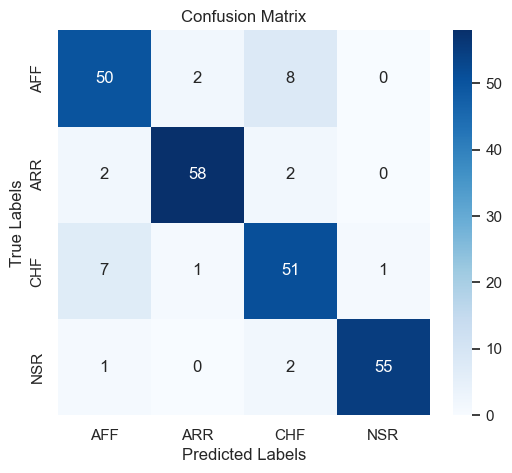

In [84]:
# حساب المصفوفة
cm = confusion_matrix(y_test, prediction(X_test, train_using_entropy(X_train, X_test, y_train)))

# أسماء الفئات
classes = ["AFF", "ARR", "CHF", "NSR"]

# رسم الكونفيوجن ماتريكس
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# تسمية المحاور
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [90]:
df.to_csv('ECG_to_model_data.csv')